# O Naufrágio do Titanic

O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

Página da Competição: https://www.kaggle.com/c/titanic


# Importar principais bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Carregar dados

Ler arquivos train.csv e test.csv

In [2]:
train_df = pd.read_csv('titanic/train.CSV')
test_df = pd.read_csv('titanic/test.CSV')

In [3]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Análise Exploratória de Dados (AED)

## Definir o ID do passageiro como Index

In [5]:
train_df.set_index(keys = 'PassengerId', inplace=True)

In [6]:
test_df.set_index(keys = 'PassengerId', inplace=True)

In [7]:
train_df.columns, test_df.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

## Verificar shape e concatenar data frames

In [8]:
train_df.shape, test_df.shape

((891, 11), (418, 10))

In [9]:
data_set_df = pd.concat([train_df,test_df], axis=0, sort=False)   

# O data frame test_df nao possui a coluna "Survived", assim, ao concatenar, as linhas correspondentes
# a ele receberam NaN em "Survived". 

In [10]:
data_set_df.shape

(1309, 11)

## Traduzir colunas e classes

In [11]:
data_set_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data_set_df.columns = ['Sobreviveu','Classe','Nome','Sexo','Idade','IrmaoConjuge','PaisFilhos', 
                       'Bilhete','Tarifa','Cabine','Embarque']

In [13]:
data_set_df['Sexo'] = data_set_df['Sexo'].map({'male':'Masculino','female':'Feminino'})

In [14]:
data_set_df = data_set_df[['Nome','Bilhete','Classe','Cabine','Embarque','Sexo','Idade','IrmaoConjuge','PaisFilhos', 
            'Tarifa','Sobreviveu']]
data_set_df.head(2)

,Nome,Bilhete,Classe,Cabine,Embarque,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Sobreviveu
PassengerId,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,3,NaN,S,Masculino,22.0,1,0,7.2500,0.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,1,C85,C,Feminino,38.0,1,0,71.2833,1.0


## Verificar dados faltantes

In [15]:
data_set_df.isnull().sum()

Nome               0
Bilhete            0
Classe             0
Cabine          1014
Embarque           2
Sexo               0
Idade            263
IrmaoConjuge       0
PaisFilhos         0
Tarifa             1
Sobreviveu       418
dtype: int64

### Preencher Embarque 

Esta coluna (de valores categóricos) possui apenas dois valores ausentes, vamos preencher com a moda.

In [16]:
data_set_df['Embarque'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarque, dtype: object

In [17]:
moda = data_set_df['Embarque'].mode()[0]
moda

'S'

In [18]:
data_set_df['Embarque'].fillna(value=moda, inplace=True)

### Preencher Tarifa 

Esta coluna possui apenas um valor nulo, substituiremos pelo valor médio da tarifa

In [19]:
media = data_set_df['Tarifa'].mean()
media

33.2954792813456

In [20]:
data_set_df['Tarifa'].fillna(value=media, inplace=True)

In [21]:
data_set_df.isnull().sum()

Nome               0
Bilhete            0
Classe             0
Cabine          1014
Embarque           0
Sexo               0
Idade            263
IrmaoConjuge       0
PaisFilhos         0
Tarifa             0
Sobreviveu       418
dtype: int64

### Excluir coluna Cabine

77,46% dos valores são nulos

In [22]:
data_set_df.drop('Cabine', axis=1, inplace=True)

## Informações do data frame

In [23]:
data_set_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          1309 non-null   object 
 1   Bilhete       1309 non-null   object 
 2   Classe        1309 non-null   int64  
 3   Embarque      1309 non-null   object 
 4   Sexo          1309 non-null   object 
 5   Idade         1046 non-null   float64
 6   IrmaoConjuge  1309 non-null   int64  
 7   PaisFilhos    1309 non-null   int64  
 8   Tarifa        1309 non-null   float64
 9   Sobreviveu    891 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 112.5+ KB


In [24]:
data_set_df['Classe'] = data_set_df['Classe'].astype('object')

In [25]:
data_set_df.describe()

,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Sobreviveu
count,1046.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,0.498854,0.385027,33.295479,0.383838
std,14.413493,1.041658,0.865560,51.738879,0.486592
min,0.170000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,39.000000,1.000000,0.000000,31.275000,1.000000
max,80.000000,8.000000,9.000000,512.329200,1.000000


In [26]:
data_set_df.describe(include=['O'])

,Nome,Bilhete,Classe,Embarque,Sexo
count,1309,1309,1309,1309,1309
unique,1307,929,3,3,2
top,"Connolly, Miss. Kate",CA. 2343,3,S,Masculino
freq,2,11,709,916,843


In [27]:
data_set_df.head()

,Nome,Bilhete,Classe,Embarque,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Sobreviveu
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,3,S,Masculino,22.0,1,0,7.2500,0.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,1,C,Feminino,38.0,1,0,71.2833,1.0
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,3,S,Feminino,26.0,0,0,7.9250,1.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,1,S,Feminino,35.0,1,0,53.1000,1.0
5,"Allen, Mr. William Henry",373450,3,S,Masculino,35.0,0,0,8.0500,0.0


## Informações agrupadas

### Sobrevivência por Classe

In [28]:
pd.crosstab(data_set_df['Classe'], data_set_df['Sobreviveu'], margins=True)\
.style.background_gradient(cmap='OrRd')

Sobreviveu,0.0,1.0,All
Classe,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [29]:
data_set_df[['Classe','Sobreviveu']].groupby(['Classe']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


- Passageiros da 1ª têm maior tendência a sobreviver (62,96%) do que os passegeiros da 2ª (47,28%) e 3ª (24,24%);
- Passageiros da 2ª são mais propensos a sobreviver do que passageiros da terceira.

### Sobrevivência por Sexo 

In [30]:
pd.crosstab(data_set_df['Sexo'],data_set_df['Sobreviveu'], margins=True)\
.style.background_gradient(cmap='OrRd')

Sobreviveu,0.0,1.0,All
Sexo,,,
Feminino,81,233,314
Masculino,468,109,577
All,549,342,891


In [31]:
data_set_df[['Sexo','Sobreviveu']].groupby(['Sexo']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
Feminino,0.742038
Masculino,0.188908


- Mulheres são mais propensas a sobreviver. 74,2% das mulheres sobreviveram enquanto os homens apenas 18,9%.
- 81,11% dos homnens morreram no naufrágio.

### Sobrevivência por Embarque

In [32]:
pd.crosstab(data_set_df['Embarque'],data_set_df['Sobreviveu'], margins=True)\
.style.background_gradient(cmap='OrRd')

Sobreviveu,0.0,1.0,All
Embarque,,,
C,75,93,168
Q,47,30,77
S,427,219,646
All,549,342,891


In [33]:
data_set_df[['Embarque','Sobreviveu']].groupby(['Embarque']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Embarque,
C,0.553571
Q,0.389610
S,0.339009


- Passageiros que embarcaram no portão C tiveram taxa de sobrevivência maior do que nos portões Q e S;
- 72,5% dos passageiros embarcaram no portão S e foi o local de embarque com a menor taxa de sobrevivência.

### Sobrevivência versus IrmaoConjuge

In [34]:
data_set_df[['IrmaoConjuge','Sobreviveu']].groupby(['IrmaoConjuge']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaoConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [35]:
# quantidade de pessoas por subclasse de "IrmaoConjuge"
data_set_df.loc[data_set_df['Sobreviveu'].isnull() == False]['IrmaoConjuge'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: IrmaoConjuge, dtype: int64

Obs.: se o passageiro é um criança ou adulto solteiro, então ele tem a possibilidade de ter irmãos a bordo do navio. Caso seja uma pessoa adulta casada, a possibilidade é de ter o(a) esposo(a) a bordo. 

### Sobrevivência por PaisFilhos

In [36]:
data_set_df[['PaisFilhos','Sobreviveu']].groupby(['PaisFilhos']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


In [37]:
# quantidade de pessoas por classe de "PaisFilhos"
data_set_df.loc[data_set_df['Sobreviveu'].isnull() == False]['PaisFilhos'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: PaisFilhos, dtype: int64

Obs.: se o passageiro é um criança ou adulto solteiro, então ele tem a possibilidade de estar com os pais a bordo do navio. Caso seja uma pessoa adulta casada, provavelmente estavam com os filhos a bordo, mas tbm há a possibilidade de estar com filhos e pais.

# Visualização de dados

### Sobreviventes ( 0 = não sobreviveu, 1 = sobreviveu)

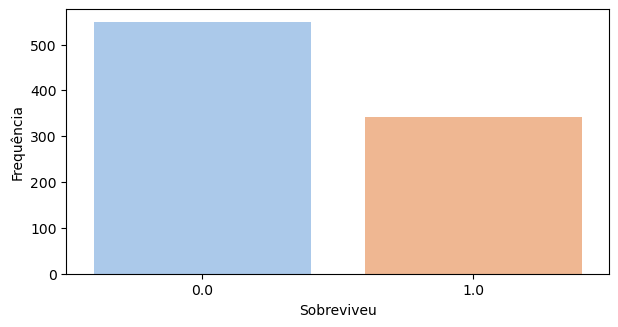

In [38]:
plt.figure(figsize=(7,3.5), dpi=100)
plot = sns.countplot(x='Sobreviveu', data=data_set_df, palette='pastel')
plot.set_xlabel('Sobreviveu')
plot.set_ylabel('Frequência')
plt.show()

- Maior parte das pessoas não sobreviveram ao acidente.

### Sobreviventes por sexo

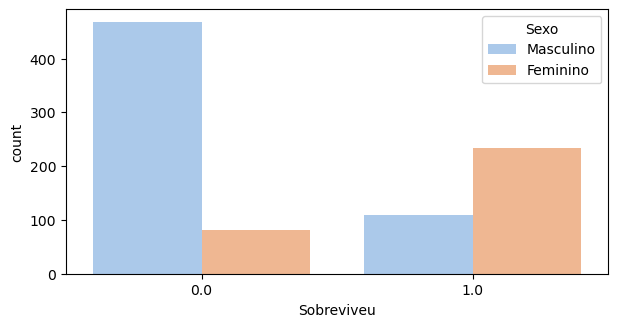

In [39]:
plt.figure(figsize=(7,3.5), dpi=100)
sns.countplot(x='Sobreviveu', data=data_set_df, hue='Sexo', palette='pastel');

In [40]:
data_set_df.groupby(['Sobreviveu', 'Sexo'])['Sobreviveu'].count()

Sobreviveu  Sexo     
0.0         Feminino      81
            Masculino    468
1.0         Feminino     233
            Masculino    109
Name: Sobreviveu, dtype: int64

- Mulheres sobreviveram mais do que os homens;
- Dentre as pessoas que morreram, 85,25% era do sexo masculino.

### Distribuição da Idade por Sobrevivência

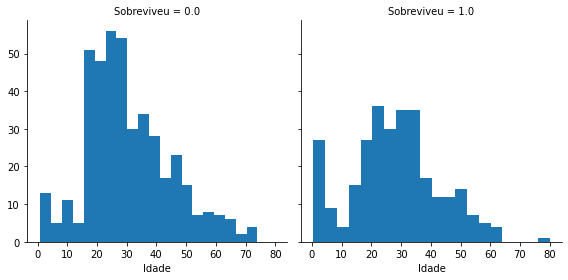

In [41]:
grid = sns.FacetGrid(data=data_set_df, col='Sobreviveu', height=4)
grid.map(plt.hist, 'Idade', bins=20);
grid.set(xticks=[0,10,20,30,40,50,60,70,80])
plt.show()

- Maior parte das pessoas que morreram tinham idades entre 15 a 30 anos;  
- Dentre as pessoas que sobreviveram, maior parte tinham idade entre 20 a 35 anos.

### Distribuição da Idade por Classe e Sobrevivência

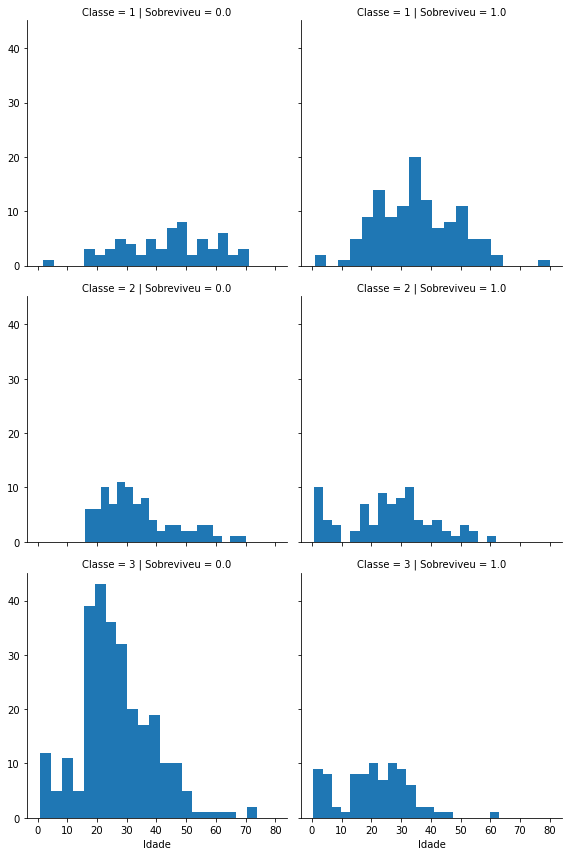

In [42]:
grid2 = sns.FacetGrid(data=data_set_df, row='Classe', col='Sobreviveu', height=4)
grid2.map(plt.hist, 'Idade', bins=20);
grid2.set(xticks=[0,10,20,30,40,50,60,70,80]);

- Na primeira classe sobreviveram muitas pessoas com faixa etária entre 20 e 55 anos;
- Na segunda e terceira classes, pessoas acima de 35 tem menor probabilidade de sobreviver (dentre as pessoas que sobreviveram);
- Na primeira classe maior parte das pessoas sobreviveram enquanto na terceira a maioria morreu;
- Na terceira classe morrreu muita gente com idade entre 15 e 30 anos.

### Sobrevivência por Embarque

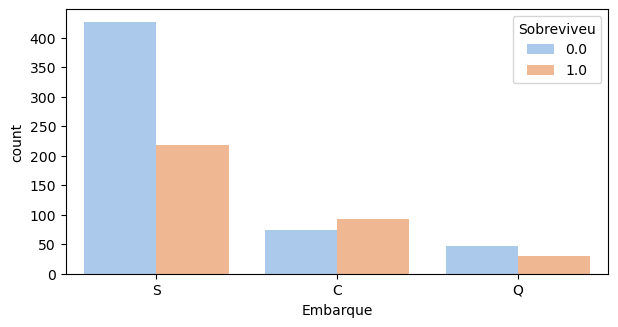

In [43]:
plt.figure(figsize=(7,3.5), dpi=100)
sns.countplot(x='Embarque', hue='Sobreviveu', data=data_set_df, palette='pastel');

In [44]:
data_set_df.groupby(['Embarque', 'Sobreviveu'])['Sobreviveu'].count()

Embarque  Sobreviveu
C         0.0            75
          1.0            93
Q         0.0            47
          1.0            30
S         0.0           427
          1.0           219
Name: Sobreviveu, dtype: int64

- A maioria das pessoas que embarcaram no portão S morreram;
- No portão C a quantidade de pessoas que sobreviveram foi maior do que as que morreram.

In [45]:
pd.crosstab(data_set_df.loc[data_set_df['Sobreviveu'].isnull() == False]['Embarque'], 
            data_set_df.loc[data_set_df['Sobreviveu'].isnull() == False]['Classe'], 
            margins=True)

Classe,1,2,3,All
Embarque,,,,
C,85,17,66,168
Q,2,3,72,77
S,129,164,353,646
All,216,184,491,891


- Cruzando as informações de Classe e Embarque, temos que 50,6% das pessoas que embarcaram no portão C é da primeira classe.
- Nos outros portões de Embarque a taxa de passageiros na primeira são menores.

### Sobrevivência por Embarque e Sexo

<Figure size 900x600 with 0 Axes>

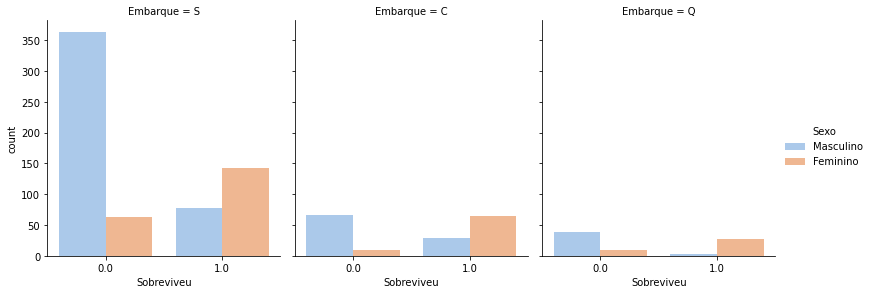

In [46]:
plt.figure(dpi=150)
SES = sns.catplot(x="Sobreviveu",hue="Sexo", col="Embarque", data=data_set_df, 
                  kind="count",dodge=True, palette='pastel',height=4, aspect=0.9);

- Em todos os portões de embarque as mulheres tiveram mais de 69% de sobrevivência;
- Em todos os portões de embarque os homens tiveram maior número de óbitos;
- O maior percentual de sobrevivência para os homens foi no Embarque C com 30,5%.

### Taxa de Sobrevivência por Classe, Embarque e Sexo

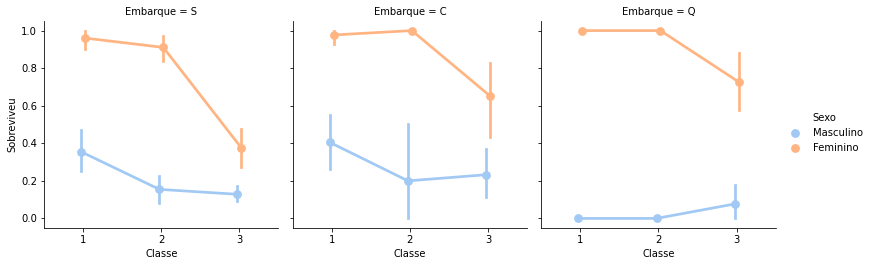

In [47]:
SCES = sns.catplot(x="Classe", y="Sobreviveu", hue="Sexo", col="Embarque", data=data_set_df, 
                   kind="point", dodge=True, palette='pastel', height=3.6, aspect=1.0);

In [48]:
taxa_sobreviventes = data_set_df.groupby(['Embarque','Sexo','Classe'])['Sobreviveu'].mean()
total_passageiros = data_set_df.groupby(['Embarque','Sexo','Classe'])['Sobreviveu'].count()
num_sobreviventes = data_set_df.loc[data_set_df['Sobreviveu'] ==1].groupby(['Embarque','Sexo','Classe'])['Sobreviveu'].count()
relacao_sobreviventes_df = pd.concat([total_passageiros,num_sobreviventes,taxa_sobreviventes],axis=1)

In [49]:
relacao_sobreviventes_df.columns = ['total de passageiros', 'numero de sobreviventes', 'taxa de sobreviventes']
relacao_sobreviventes_df

total de passageiros  numero de sobreviventes  \
Embarque Sexo      Classe                                                  
C        Feminino  1                         43                     42.0   
                   2                          7                      7.0   
                   3                         23                     15.0   
         Masculino 1                         42                     17.0   
                   2                         10                      2.0   
                   3                         43                     10.0   
Q        Feminino  1                          1                      1.0   
                   2                          2                      2.0   
                   3                         33                     24.0   
         Masculino 1                          1                      NaN   
                   2                          1                      NaN   
                   3                         39                      3.0   
S        Feminino  1                         50                     48.0   
                   2                         67                     61.0   
                   3                         88                     33.0   
         Masculino 1                         79                     28.0   
                   2                         97                     15.0   
                   3                        265                     34.0   

                           taxa de sobreviventes  
Embarque Sexo      Classe                         
C        Feminino  1                    0.976744  
                   2                    1.000000  
                   3                    0.652174  
         Masculino 1                    0.404762  
                   2                    0.200000  
                   3                    0.232558  
Q        Feminino  1                    1.000000  
                   2                    1.000000  
                   3                    0.727273  
         Masculino 1                    0.000000  
                   2                    0.000000  
                   3                    0.076923  
S        Feminino  1                    0.960000  
                   2                    0.910448  
                   3                    0.375000  
         Masculino 1                    0.354430  
                   2                    0.154639  
                   3                    0.128302

- As mulheres tiveram maior sobrevivência em todos os portões de embarque e em todas as classes;
- No Embarque C o público masculino tiveram as melhores taxas de sobrevivência;
- Independente da Classe e Embarque, homens tiveram menores taxas de sobrevivência;
- Independente do Embarque, mulheres na terceira classe tiveram menor taxa de sobrevivência. 

### Preço da Tarifa por Sexo e Sobrevivência 

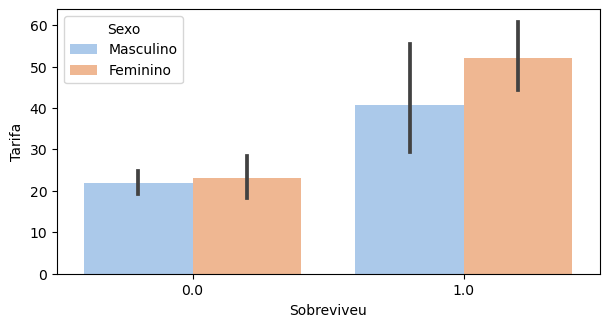

In [50]:
plt.figure(figsize=(7,3.5), dpi=100)
sns.barplot(x = 'Sobreviveu', y = 'Tarifa', hue = 'Sexo', data = data_set_df, palette='pastel');

- As pessoas que sobreviveram em média pagaram mais caro;
- Mulheres sobreviveram mais, porém, pagaram mais caro (a sobrevivência teve um custo); 
- Homens e mulheres que morreram no naufrágio pagaram valores aproximados (e menores).

### Preço da Tarifa por Classe, Embarque e Sobrevivência 

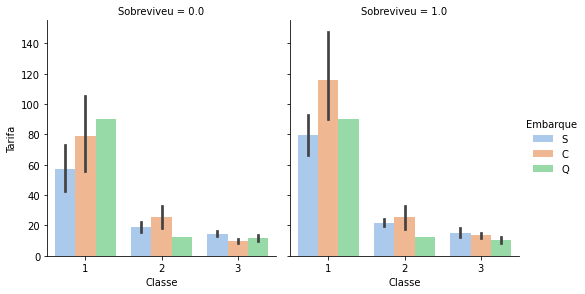

In [51]:
TCES = sns.catplot(x="Classe",y='Tarifa',hue="Embarque", col="Sobreviveu", data=data_set_df, 
                  kind="bar",dodge=True, palette='pastel',height=4, aspect=0.9);

- Os passageiros da primeira classe pagaram valores mais elevados;
- O portão de Embarque C, que teve maior percentual de sobrevivência, pagou o valor médio mais elevado;
- No Embarque C a maioria das pesssoas eram da primeira classe.

### Boxplot Idade por Classe e Sexo

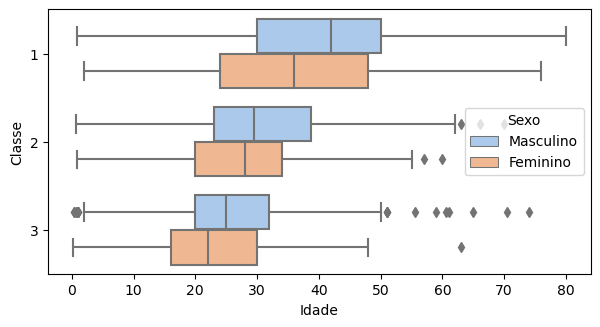

In [52]:
plt.figure(figsize=(7,3.5), dpi=100)
sns.boxplot(y='Classe', x='Idade', hue='Sexo', data=data_set_df, orient="h", palette='pastel');

- Na primeira classe houve uma maior variabilidade entre as idades;
- A medida que a classe sobe a variabilidade da idade foi menor, porém, com a presença de alguns outliers.

### Média das Idades por Classe, Sobrevivência e Sexo

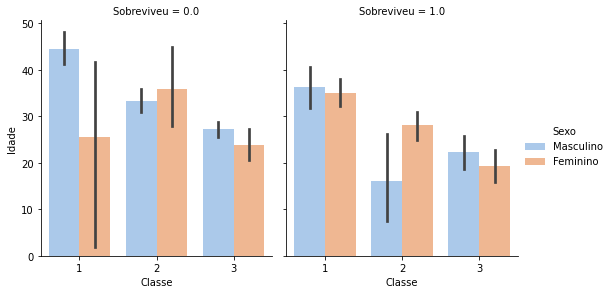

In [53]:
ICSS = sns.catplot(x="Classe",y='Idade',hue="Sexo", col="Sobreviveu", data=data_set_df, 
                kind="bar",dodge=True, palette='pastel', height=4, aspect=0.9);

- Com excessão das mulheres da primeira classe, pessoas que sobreviveram tinha média de idade menor do que os que morreram.

### Quantidade de passageiros por Classe, Sexo e Sobrevivência 

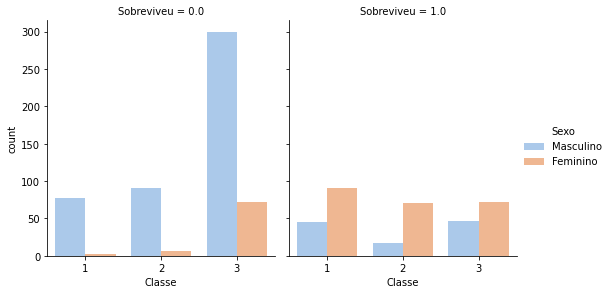

In [54]:
QSCS = sns.catplot(x='Classe',hue="Sexo", col="Sobreviveu", data=data_set_df, 
                  kind="count",dodge=True, palette='pastel',height=4, aspect=0.9);

- Independente da classe, a quantidade de óbitos para os homens foram maiores;
- Para as mulheres observa-se o oposto.

### Visualizando os dados faltantes

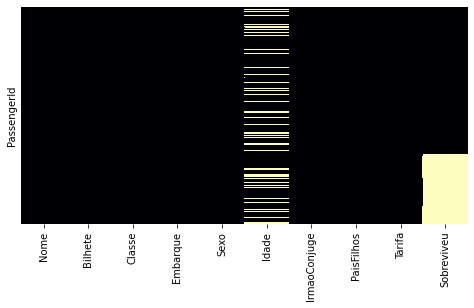

In [55]:
plt.figure(figsize=(8,4))
sns.heatmap(data = data_set_df.isnull(), yticklabels=False, cbar=False, cmap='magma');

# Agregação (feature engineering)

## Identificar classificação (pronome de tratamento) para os Nomes

In [56]:
data_resources_df = data_set_df.copy(deep=True)
data_resources_df.head(3)

,Nome,Bilhete,Classe,Embarque,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Sobreviveu
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,3,S,Masculino,22.0,1,0,7.2500,0.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,1,C,Feminino,38.0,1,0,71.2833,1.0
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,3,S,Feminino,26.0,0,0,7.9250,1.0


In [57]:
data_resources_df['Classificacao'] = data_resources_df['Nome'].str.extract('([a-zA-Z]+)\.') 

In [58]:
data_resources_df['Classificacao'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [59]:
pd.crosstab(data_resources_df['Classificacao'], data_resources_df['Sexo'])

Sexo,Feminino,Masculino
Classificacao,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [60]:
data_resources_df['Classificacao'] = data_resources_df['Classificacao']\
.apply(lambda x: 'Outros' if x not in ['Mrs','Mr','Miss','Master'] else x)

In [61]:
data_resources_df['Classificacao'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Outros'], dtype=object)

In [62]:
Traduzir_classificacao = {
    'Mr':'Homem_adulto', 
    'Mrs':'Mulher_casada', 
    'Miss':'Mulher_solteira', 
    'Master':'Menino', 
    'Outros':'Outros'
}

In [63]:
data_resources_df['Classificacao'] = data_resources_df['Classificacao'].map(Traduzir_classificacao)

In [64]:
data_resources_df['Classificacao'].unique()

array(['Homem_adulto', 'Mulher_casada', 'Mulher_solteira', 'Menino',
       'Outros'], dtype=object)

In [65]:
pd.crosstab(data_resources_df['Classificacao'], data_resources_df['Sexo'])

Sexo,Feminino,Masculino
Classificacao,,
Homem_adulto,0,757
Menino,0,61
Mulher_casada,197,0
Mulher_solteira,260,0
Outros,9,25


## Identificar pessoas da mesma família (pessoas com o mesmo sobrenome)

In [66]:
data_resources_df['Sobrenome'] = data_resources_df['Nome'].str.split(',').str[0]

In [67]:
data_resources_df.head(3)

,Nome,Bilhete,Classe,Embarque,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Sobreviveu,Classificacao,Sobrenome
PassengerId,,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,3,S,Masculino,22.0,1,0,7.2500,0.0,Homem_adulto,Braund
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,1,C,Feminino,38.0,1,0,71.2833,1.0,Mulher_casada,Cumings
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,3,S,Feminino,26.0,0,0,7.9250,1.0,Mulher_solteira,Heikkinen


In [68]:
data_resources_df.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending = False).head(10)

Sobrenome
Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
Carter        6
Panula        6
Brown         6
Rice          6
Fortune       6
Name: Nome, dtype: int64

In [69]:
data_resources_df[['Classificacao','Sobrenome','Bilhete','Classe','Idade','IrmaoConjuge','PaisFilhos','Sobreviveu']]\
.loc[data_resources_df['Sobrenome'] == 'Andersson']

,Classificacao,Sobrenome,Bilhete,Classe,Idade,IrmaoConjuge,PaisFilhos,Sobreviveu
PassengerId,,,,,,,,
14,Homem_adulto,Andersson,347082,3,39.0,1,5,0.0
69,Mulher_solteira,Andersson,3101281,3,17.0,4,2,1.0
120,Mulher_solteira,Andersson,347082,3,2.0,4,2,0.0
147,Homem_adulto,Andersson,350043,3,27.0,0,0,1.0
542,Mulher_solteira,Andersson,347082,3,9.0,4,2,0.0
543,Mulher_solteira,Andersson,347082,3,11.0,4,2,0.0
611,Mulher_casada,Andersson,347082,3,39.0,1,5,0.0
814,Mulher_solteira,Andersson,347082,3,6.0,4,2,0.0
851,Menino,Andersson,347082,3,4.0,4,2,0.0


- Familia Andersson <br>
Homem_adulto e IrmaoConjuge = 1 => Ser o PAI da família  <br>
PaisFilhos = 5
- Familia Sage <br>
Homem_adulto e IrmaoConjuge = 1 => Ser o PAI da família  <br>
PaisFilhos = 9
- Familia Goodwin <br>
Homem_adulto e IrmaoConjuge = 1 => Ser o PAI da família  <br>
PaisFilhos = 6 
- Familia Asplund <br>
Homem_adulto e IrmaoConjuge = 1 => Ser o PAI da família  <br>
PaisFilhos = 5  


## Identificar o pai de família e classificar como "Homem_casado"

In [70]:
for i,_ in data_resources_df.iterrows():
    if (data_resources_df['Classificacao'].at[i] == 'Homem_adulto') & (data_resources_df['IrmaoConjuge'].at[i] == 1)\
    & (data_resources_df['PaisFilhos'].at[i] >= 0):
        data_resources_df['Classificacao'].at[i] = 'Homem_casado'
        

In [71]:
pd.crosstab(data_resources_df['Classificacao'], data_resources_df['Sobreviveu'])

Sobreviveu,0.0,1.0
Classificacao,,
Homem_adulto,367,65
Homem_casado,69,16
Menino,17,23
Mulher_casada,26,99
Mulher_solteira,55,127
Outros,15,12


In [72]:
data_resources_df.groupby(['Classificacao'])['Idade'].mean()

Classificacao
Homem_adulto       31.547312
Homem_casado       35.077586
Menino              5.482642
Mulher_casada      36.994118
Mulher_solteira    21.774238
Outros             42.656250
Name: Idade, dtype: float64

## Mulheres e Crianças sobreviveram ou morreram juntos?

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [73]:
data_resources_df[['Classificacao','Sobrenome','Bilhete','Classe','Idade','IrmaoConjuge','PaisFilhos','Sobreviveu']]\
.loc[data_resources_df['Sobrenome'] == 'Andersson']\
.loc[(data_resources_df['Classificacao'] == 'Menino') | (data_resources_df['Sexo'] == 'Feminino')]

,Classificacao,Sobrenome,Bilhete,Classe,Idade,IrmaoConjuge,PaisFilhos,Sobreviveu
PassengerId,,,,,,,,
69,Mulher_solteira,Andersson,3101281,3,17.0,4,2,1.0
120,Mulher_solteira,Andersson,347082,3,2.0,4,2,0.0
542,Mulher_solteira,Andersson,347082,3,9.0,4,2,0.0
543,Mulher_solteira,Andersson,347082,3,11.0,4,2,0.0
611,Mulher_casada,Andersson,347082,3,39.0,1,5,0.0
814,Mulher_solteira,Andersson,347082,3,6.0,4,2,0.0
851,Menino,Andersson,347082,3,4.0,4,2,0.0
1106,Mulher_solteira,Andersson,347091,3,38.0,4,2,NaN


- Sobreviveu apenas uma pessoa jovem do sexo feminino;
- Mulher casada tem IrmaoConjuge = 1

### Analisar Sobrevivência de Mulheres e Crianças da Família "Sage"

In [74]:
data_resources_df[['Classificacao','Sobrenome','Bilhete','Classe','Idade','IrmaoConjuge','PaisFilhos','Sobreviveu']]\
.loc[data_resources_df['Sobrenome'] == 'Sage']\
.loc[(data_resources_df['Classificacao'] == 'Menino') | (data_resources_df['Sexo'] == 'Feminino')]

,Classificacao,Sobrenome,Bilhete,Classe,Idade,IrmaoConjuge,PaisFilhos,Sobreviveu
PassengerId,,,,,,,,
160,Menino,Sage,CA. 2343,3,NaN,8,2,0.0
181,Mulher_solteira,Sage,CA. 2343,3,NaN,8,2,0.0
793,Mulher_solteira,Sage,CA. 2343,3,NaN,8,2,0.0
864,Mulher_solteira,Sage,CA. 2343,3,NaN,8,2,0.0
1080,Mulher_solteira,Sage,CA. 2343,3,NaN,8,2,NaN
1252,Menino,Sage,CA. 2343,3,14.5,8,2,NaN
1257,Mulher_casada,Sage,CA. 2343,3,NaN,1,9,NaN


- Todos os membros da família morreram juntos
- Mulher casada tem IrmaoConjuge = 1

### Analisar Sobrevivência de Mulheres e Crianças da Família "Goodwin"

In [75]:
data_resources_df[['Classificacao','Sobrenome','Bilhete','Classe','Idade','IrmaoConjuge','PaisFilhos','Sobreviveu']]\
.loc[data_resources_df['Sobrenome'] == 'Goodwin']\
.loc[(data_resources_df['Classificacao'] == 'Menino') | (data_resources_df['Sexo'] == 'Feminino')]

,Classificacao,Sobrenome,Bilhete,Classe,Idade,IrmaoConjuge,PaisFilhos,Sobreviveu
PassengerId,,,,,,,,
60,Menino,Goodwin,CA 2144,3,11.0,5,2,0.0
72,Mulher_solteira,Goodwin,CA 2144,3,16.0,5,2,0.0
387,Menino,Goodwin,CA 2144,3,1.0,5,2,0.0
481,Menino,Goodwin,CA 2144,3,9.0,5,2,0.0
679,Mulher_casada,Goodwin,CA 2144,3,43.0,1,6,0.0
1032,Mulher_solteira,Goodwin,CA 2144,3,10.0,5,2,NaN


- Todos os membros da família morreram juntos
- Mulher casada tem IrmaoConjuge = 1

## Criar Feature Sobrevivência de mulheres e crianças (é a taxa de sobrevivência de mulheres e crianças da mesma família)

In [76]:
# taxa de sobrevivência da família Andersson
data_resources_df[['Classificacao', 'Sobreviveu','Sobrenome']].loc[data_resources_df['Sobrenome']=='Andersson']\
.loc[(data_resources_df['Sexo']=='Feminino') | (data_resources_df['Classificacao']=='Menino')]['Sobreviveu'].mean()

0.14285714285714285

In [77]:
data_resources_df['Sobrev_mulher_crianca'] = data_resources_df['Sobrenome']\
.apply(lambda x: data_resources_df.loc[data_resources_df['Sobrenome']==x]\
       .loc[(data_resources_df['Sexo']=='Feminino') | (data_resources_df['Classificacao']=='Menino')]['Sobreviveu'].mean()) 

In [78]:
data_resources_df[['Sobrenome','Sobrev_mulher_crianca','Classificacao']].head(10)

,Sobrenome,Sobrev_mulher_crianca,Classificacao
PassengerId,,,
1,Braund,NaN,Homem_casado
2,Cumings,1.0,Mulher_casada
3,Heikkinen,1.0,Mulher_solteira
4,Futrelle,1.0,Mulher_casada
5,Allen,1.0,Homem_adulto
6,Moran,1.0,Homem_adulto
7,McCarthy,NaN,Homem_adulto
8,Palsson,0.0,Menino
9,Johnson,1.0,Mulher_casada


Obs.: queremos apenas o indice de sobrevivencia de mulheres e crianças!

In [79]:
for idx,_ in data_resources_df.iterrows():
    if (data_resources_df['Classificacao'].at[idx] == 'Homem_adulto')\
    | (data_resources_df['Classificacao'].at[idx] == 'Homem_casado')\
    | (data_resources_df['Classificacao'].at[idx] == 'Outros'):
        data_resources_df['Sobrev_mulher_crianca'].at[idx] = 0

In [80]:
data_resources_df['Sobrev_mulher_crianca'].isnull().sum()

101

In [81]:
data_resources_df['Sobrev_mulher_crianca'].fillna(0,inplace=True)

## Remover colunas que não serão utilizadas

In [82]:
data_resources_df.shape, data_resources_df.isnull().sum()

((1309, 13),
 Nome                       0
 Bilhete                    0
 Classe                     0
 Embarque                   0
 Sexo                       0
 Idade                    263
 IrmaoConjuge               0
 PaisFilhos                 0
 Tarifa                     0
 Sobreviveu               418
 Classificacao              0
 Sobrenome                  0
 Sobrev_mulher_crianca      0
 dtype: int64)

In [83]:
data_select_df = data_resources_df.drop(labels = ['Nome','Bilhete','Sobrenome'],axis=1)

In [84]:
data_select_df = data_select_df[['Classificacao','Sexo','Embarque','Classe','Idade','Tarifa','IrmaoConjuge',
                                 'PaisFilhos','Sobrev_mulher_crianca','Sobreviveu']]

In [85]:
data_select_df.head()

,Classificacao,Sexo,Embarque,Classe,Idade,Tarifa,IrmaoConjuge,PaisFilhos,Sobrev_mulher_crianca,Sobreviveu
PassengerId,,,,,,,,,,
1,Homem_casado,Masculino,S,3,22.0,7.2500,1,0,0.0,0.0
2,Mulher_casada,Feminino,C,1,38.0,71.2833,1,0,1.0,1.0
3,Mulher_solteira,Feminino,S,3,26.0,7.9250,0,0,1.0,1.0
4,Mulher_casada,Feminino,S,1,35.0,53.1000,1,0,1.0,1.0
5,Homem_adulto,Masculino,S,3,35.0,8.0500,0,0,0.0,0.0


## Preencher Idade com a média de cada Classificação

In [86]:
data_select_df.groupby(['Classificacao'])['Idade'].mean()

Classificacao
Homem_adulto       31.547312
Homem_casado       35.077586
Menino              5.482642
Mulher_casada      36.994118
Mulher_solteira    21.774238
Outros             42.656250
Name: Idade, dtype: float64

In [87]:
Idade_h_adulto = data_select_df.loc[data_select_df['Classificacao'] == 'Homem_adulto']['Idade'].mean()
Idade_h_casado = data_select_df.loc[data_select_df['Classificacao'] == 'Homem_casado']['Idade'].mean()
Idade_menino = data_select_df.loc[data_select_df['Classificacao'] == 'Menino']['Idade'].mean()
Idade_m_casada = data_select_df.loc[data_select_df['Classificacao'] == 'Mulher_casada']['Idade'].mean()
Idade_m_solteira = data_select_df.loc[data_select_df['Classificacao'] == 'Mulher_solteira']['Idade'].mean()
Idade_outros = data_select_df.loc[data_select_df['Classificacao'] == 'Outros']['Idade'].mean()

In [88]:
for idx,_ in data_select_df.iterrows():
    idade = data_select_df['Idade'].at[idx]
    if (data_select_df['Classificacao'].at[idx] == 'Homem_adulto') & (pd.isnull(idade) == True):
        data_select_df['Idade'].at[idx] = Idade_h_adulto 
    elif (data_select_df['Classificacao'].at[idx] == 'Homem_casado') & (pd.isnull(idade) == True):
        data_select_df['Idade'].at[idx] = Idade_h_casado  
    elif (data_select_df['Classificacao'].at[idx] == 'Menino') & (pd.isnull(idade) == True):
        data_select_df['Idade'].at[idx] = Idade_menino
    elif (data_select_df['Classificacao'].at[idx] == 'Mulher_casada') & (pd.isnull(idade) == True):
        data_select_df['Idade'].at[idx] = Idade_m_casada
    elif (data_select_df['Classificacao'].at[idx] == 'Mulher_solteira') & (pd.isnull(idade) == True):
        data_select_df['Idade'].at[idx] = Idade_m_solteira
    elif (data_select_df['Classificacao'].at[idx] == 'Outros') & (pd.isnull(idade) == True):
        data_select_df['Idade'].at[idx] = Idade_outros
    else:
        data_select_df['Idade'].at[idx] = data_select_df['Idade'].at[idx]

In [89]:
data_select_df.isnull().sum()

Classificacao              0
Sexo                       0
Embarque                   0
Classe                     0
Idade                      0
Tarifa                     0
IrmaoConjuge               0
PaisFilhos                 0
Sobrev_mulher_crianca      0
Sobreviveu               418
dtype: int64

## Criar dummies para variáveis categóricas

In [90]:
data_select_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Classificacao          1309 non-null   object 
 1   Sexo                   1309 non-null   object 
 2   Embarque               1309 non-null   object 
 3   Classe                 1309 non-null   object 
 4   Idade                  1309 non-null   float64
 5   Tarifa                 1309 non-null   float64
 6   IrmaoConjuge           1309 non-null   int64  
 7   PaisFilhos             1309 non-null   int64  
 8   Sobrev_mulher_crianca  1309 non-null   float64
 9   Sobreviveu             891 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 144.8+ KB


In [91]:
data_select_df.head()

,Classificacao,Sexo,Embarque,Classe,Idade,Tarifa,IrmaoConjuge,PaisFilhos,Sobrev_mulher_crianca,Sobreviveu
PassengerId,,,,,,,,,,
1,Homem_casado,Masculino,S,3,22.0,7.2500,1,0,0.0,0.0
2,Mulher_casada,Feminino,C,1,38.0,71.2833,1,0,1.0,1.0
3,Mulher_solteira,Feminino,S,3,26.0,7.9250,0,0,1.0,1.0
4,Mulher_casada,Feminino,S,1,35.0,53.1000,1,0,1.0,1.0
5,Homem_adulto,Masculino,S,3,35.0,8.0500,0,0,0.0,0.0


In [92]:
data_select_df['Sexo'] = data_select_df['Sexo'].map({'Masculino': 1,'Feminino': 0})

In [93]:
data_select_dum_df = pd.get_dummies(data_select_df, columns= ['Classificacao','Embarque','Classe']) #, drop_first=True

In [94]:
data_select_dum_df.shape

(1309, 19)

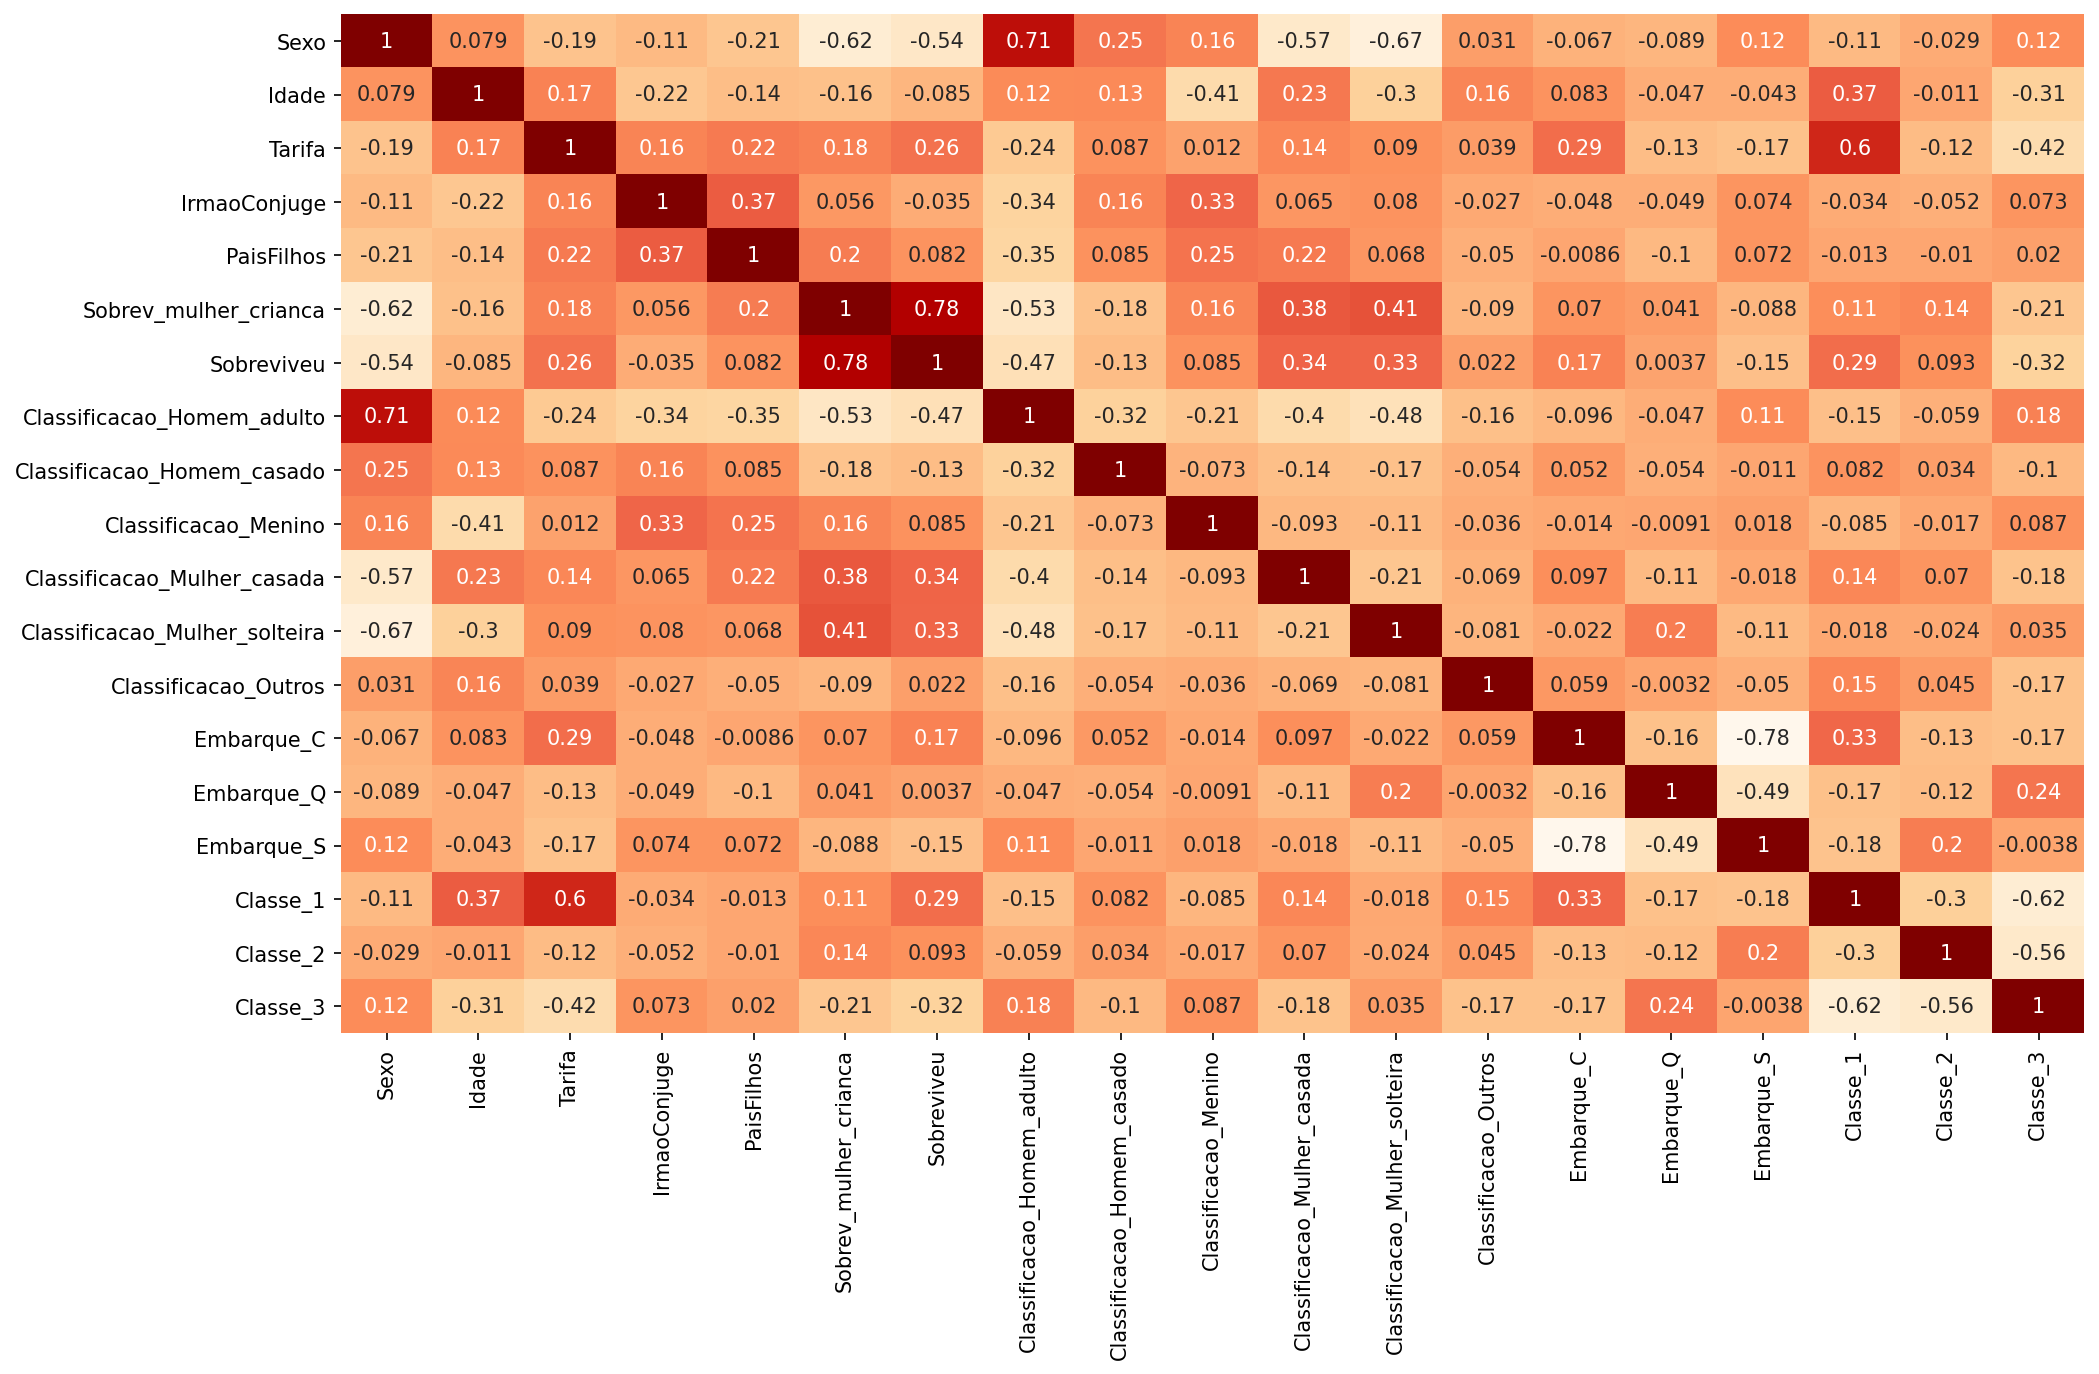

In [95]:
plt.figure(figsize=(15,9),dpi=150)
sns.heatmap(data_select_dum_df.corr(),annot=True,cbar=False,cmap='OrRd');

## Atualizar conjunto de treino e teste

In [96]:
train_survive_df = data_select_dum_df.loc[train_df.index]

In [97]:
test_survive_df = data_select_dum_df.loc[test_df.index]
test_survive_df.drop('Sobreviveu',axis=1,inplace=True)

In [98]:
train_survive_df.shape, test_survive_df.shape

((891, 19), (418, 18))

### Usar train_survive_df como conjunto de treinamento para o modelo

In [99]:
X = train_survive_df.drop('Sobreviveu',axis=1)

In [100]:
y = train_survive_df['Sobreviveu']

In [101]:
X.shape, y.shape

((891, 18), (891,))

In [102]:
#plt.figure(figsize=(15,9),dpi=150)
#sns.heatmap(data_select_dum_df.corr(),annot=True,cbar=False,cmap='OrRd');

In [103]:
# Selecionar variáveis a serem utilizadas no treinamento de modelos
Filtro_variaveis = ['Sexo', 'Tarifa', 'Sobrev_mulher_crianca', 'Classificacao_Homem_adulto', 'Classificacao_Mulher_casada', 
                    'Classificacao_Mulher_solteira', 'Classe_1', 'Classe_3']

#Filtro_variaveis = ['Sexo', 'Tarifa', 'Sobrev_mulher_crianca', 'Classificacao_Homem_adulto', 'Classificacao_Homem_casado',
#       'Classificacao_Mulher_casada', 'Classificacao_Mulher_solteira', 'Embarque_C', 'Embarque_S', 'Classe_1', 'Classe_3']

In [104]:
X = X[Filtro_variaveis]

In [105]:
X.shape

(891, 8)

### Usar train_test_split para dividr o conjunto de TREINAMENTO

- Dividir 70% para treinar, 30% para testar

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [108]:
X_train.shape, y_train.shape

((623, 8), (623,))

In [109]:
X_test.shape, y_test.shape

((268, 8), (268,))

# Modelos preditivos

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Random Forest 

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf_params = {
    'n_estimators': [30,50,100,200],
    'criterion':['gini','entropy'],
    'max_depth': [2,4],
    'min_samples_leaf': [1,2,3]
}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                 param_grid=rf_params, verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.8925032258064517
RandomForestClassifier(max_depth=4, n_estimators=30, random_state=123)


In [113]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3, n_estimators=50, random_state=123)
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       n_estimators=50, random_state=123)

In [114]:
previsoes_rf = rf_model.predict(X_test)

In [115]:
accuracy_score(y_test, previsoes_rf)

0.8992537313432836

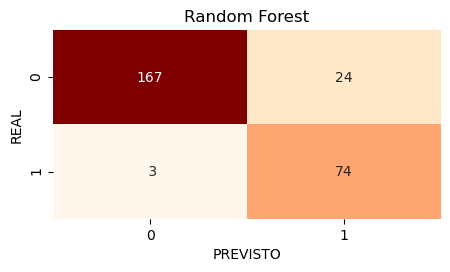

In [116]:
plt.figure(figsize=(5,2.5),dpi = 100)
sns.heatmap(confusion_matrix(previsoes_rf,y_test), cmap='OrRd', annot=True, fmt='2.0f', cbar=False)
plt.title('Random Forest')
plt.xlabel('PREVISTO')
plt.ylabel('REAL')
plt.show()

In [117]:
print(classification_report(y_test, previsoes_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.93       170
         1.0       0.96      0.76      0.85        98

    accuracy                           0.90       268
   macro avg       0.92      0.87      0.89       268
weighted avg       0.91      0.90      0.90       268



#### Escalonamento dos valores

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.fit_transform(X_test)

In [120]:
X_train.shape, X_test.shape

((623, 8), (268, 8))

## Máquinas de Vetores de Suporte (SVM)

In [121]:
from sklearn.svm import SVC

In [122]:
svm_params = {
    'C': [1,2,3],
    'kernel': ['linear','sigmoid','poly','rbf']
    }

gd = GridSearchCV(estimator=SVC(random_state=123),
                 param_grid=svm_params, verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8973161290322581
SVC(C=1, kernel='linear', random_state=123)


In [123]:
svm_model = SVC(C=1,kernel='linear',random_state=123)
svm_model.fit(X_train,y_train)

SVC(C=1, kernel='linear', random_state=123)

In [124]:
previsoes_svm = svm_model.predict(X_test)

In [125]:
accuracy_score(y_test, previsoes_svm)

0.9067164179104478

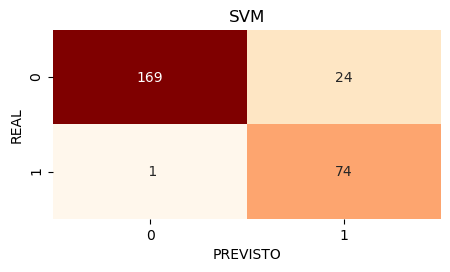

In [126]:
plt.figure(figsize=(5,2.5),dpi = 100)
sns.heatmap(confusion_matrix(previsoes_svm,y_test), cmap='OrRd', annot=True, fmt='2.0f', cbar=False)
plt.title('SVM')
plt.xlabel('PREVISTO')
plt.ylabel('REAL')
plt.show()

In [127]:
print(classification_report(y_test, previsoes_svm))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       170
         1.0       0.99      0.76      0.86        98

    accuracy                           0.91       268
   macro avg       0.93      0.87      0.89       268
weighted avg       0.92      0.91      0.90       268



## Regressão Logística

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
reglog_params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [200,300,500]
    }

gd = GridSearchCV(estimator=LogisticRegression(random_state=123),
                 param_grid=reglog_params, verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.8957161290322582
LogisticRegression(max_iter=200, random_state=123, solver='newton-cg')


In [130]:
logistic_model = LogisticRegression(solver='newton-cg', max_iter=200, random_state=123)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=123, solver='newton-cg')

In [131]:
logistic_model.intercept_, logistic_model.coef_

(array([-0.05616946]),
 array([[-1.03409894,  0.0610331 ,  3.28410825,  0.12080225, -1.11279522,
         -1.24675429,  0.72803423,  0.15124763]]))

In [132]:
previsoes_reglog = logistic_model.predict(X_test)

In [133]:
accuracy_score(y_test, previsoes_reglog)

0.9029850746268657

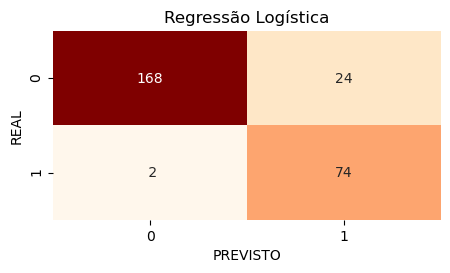

In [134]:
plt.figure(figsize=(5,2.5),dpi = 100)
sns.heatmap(confusion_matrix(previsoes_reglog,y_test), cmap='OrRd', annot=True, fmt='2.0f', cbar=False)
plt.title('Regressão Logística')
plt.xlabel('PREVISTO')
plt.ylabel('REAL')
plt.show()

In [135]:
print(classification_report(y_test, previsoes_reglog))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       170
         1.0       0.97      0.76      0.85        98

    accuracy                           0.90       268
   macro avg       0.92      0.87      0.89       268
weighted avg       0.91      0.90      0.90       268



## Redes Neurais

In [136]:
from sklearn.neural_network  import MLPClassifier

In [137]:
redNeural_params = {
    'hidden_layer_sizes': [(100,),(100,100), (100,100,100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [300,500,1000]
    }

gd = GridSearchCV(estimator=MLPClassifier(random_state=123),
                 param_grid=redNeural_params, verbose=False)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)

C:\Users\Gleynner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gleynner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gleynner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gleynner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gleynner\anaconda3\lib\site-packages\sklearn\neural

0.8973290322580645
MLPClassifier(activation='tanh', max_iter=300, random_state=123)


In [143]:
rede_neural = MLPClassifier(hidden_layer_sizes=(100,),activation='tanh',solver='adam')
rede_neural.fit(X_train,y_train)

MLPClassifier(activation='tanh')

In [144]:
previsoes_redNeural = rede_neural.predict(X_test)

In [145]:
accuracy_score(y_test, previsoes_redNeural)

0.9029850746268657

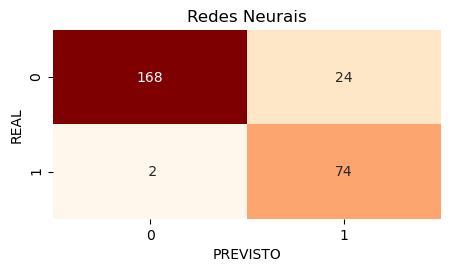

In [146]:
plt.figure(figsize=(5,2.5),dpi = 100)
sns.heatmap(confusion_matrix(previsoes_redNeural,y_test), cmap='OrRd', annot=True, fmt='2.0f', cbar=False)
plt.title('Redes Neurais')
plt.xlabel('PREVISTO')
plt.ylabel('REAL')
plt.show()

In [147]:
print(classification_report(y_test, previsoes_redNeural))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       170
         1.0       0.97      0.76      0.85        98

    accuracy                           0.90       268
   macro avg       0.92      0.87      0.89       268
weighted avg       0.91      0.90      0.90       268

